In [2]:
%matplotlib inline

In [3]:
import itertools
from time import sleep

import gc
import numpy as np
import pandas as pd
from pathlib2 import Path
from tqdm import tqdm_notebook

In [4]:
data_path = Path('data')

item_categories = pd.read_csv(data_path / 'item_categories.csv')
items = pd.read_csv(data_path / 'items.csv')
shops = pd.read_csv(data_path / 'shops.csv')

train = pd.read_csv(data_path / 'sales_train.csv')
test = pd.read_csv(data_path / 'test.csv')

groupby_cols = ['date_block_num', 'shop_id', 'item_id']

In [22]:
print(item_categories.shape)
print(items.shape)
print(shops.shape)
print(train.shape)
print(test.shape)

(84, 2)
(22170, 3)
(60, 2)
(2935847, 6)
(214200, 3)


In [5]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [6]:
items.head()
shops.head()
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [7]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [8]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [9]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


Data Description

In [10]:
def basic_eda(df):
    print("----------TOP 5 RECORDS--------")
    print(df.head(5))
    print("----------INFO-----------------")
    print(df.info())
    print("----------Describe-------------")
    print(df.describe())
    print("----------Columns--------------")
    print(df.columns)
    print("----------Data Types-----------")
    print(df.dtypes)
    print("-------Missing Values----------")
    print(df.isnull().sum())
    print("-------NULL values-------------")
    print(df.isna().sum())
    print("-----Shape Of Data-------------")
    print(df.shape)

In [14]:
print("=============================Sales Data=============================")
basic_eda(train)
print("=============================Test data=============================")
basic_eda(test)
print("=============================Item Categories=============================")
basic_eda(item_categories)
print("=============================Items=============================")
basic_eda(items)
print("=============================Shops=============================")
basic_eda(shops)


=============================Sales Data=============================
----------TOP 5 RECORDS--------
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None
----------

In [11]:
train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [12]:
train.item_cnt_day.unique()

array([ 1.000e+00, -1.000e+00,  3.000e+00,  2.000e+00,  4.000e+00,
        5.000e+00,  1.300e+01,  7.000e+00,  6.000e+00,  8.000e+00,
        1.000e+01,  1.100e+01,  3.000e+01,  2.200e+01,  1.400e+01,
        1.500e+01,  9.000e+00,  1.200e+01,  1.700e+01,  1.900e+01,
        2.000e+01, -5.000e+00, -6.000e+00, -3.000e+00, -2.000e+00,
        1.600e+01,  6.400e+01,  1.800e+01,  2.900e+01,  2.600e+01,
        3.900e+01,  2.100e+01,  2.700e+01,  5.300e+01,  2.500e+01,
        2.300e+01,  2.400e+01,  4.000e+01,  2.800e+01,  3.100e+01,
        3.600e+01, -4.000e+00,  3.200e+01,  3.500e+01,  4.100e+01,
        8.800e+01,  4.400e+01,  5.200e+01,  5.600e+01,  3.800e+01,
        3.400e+01,  5.700e+01,  6.900e+01,  3.700e+01,  4.700e+01,
        5.000e+01,  4.800e+01,  3.300e+01,  6.100e+01,  8.000e+01,
        4.200e+01,  8.200e+01,  2.000e+02,  1.000e+02,  7.600e+01,
        7.700e+01,  1.070e+02,  4.600e+01,  4.900e+01,  7.000e+01,
        5.500e+01,  6.000e+01,  4.500e+01,  7.100e+01,  6.500e

In [13]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [22]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [26]:
train['date_format'] = pd.to_datetime(train.date,format='%d.%m.%Y')

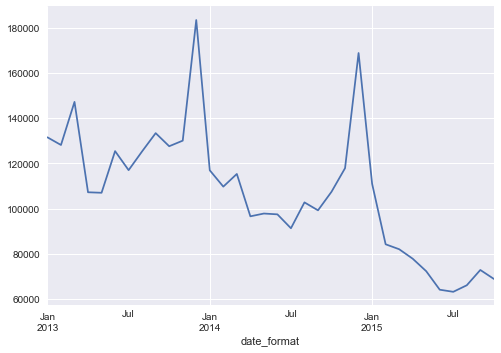

In [33]:
plt.style.use('seaborn')

train.copy().set_index('date_format').item_cnt_day.resample('M') \
                            .sum().plot();

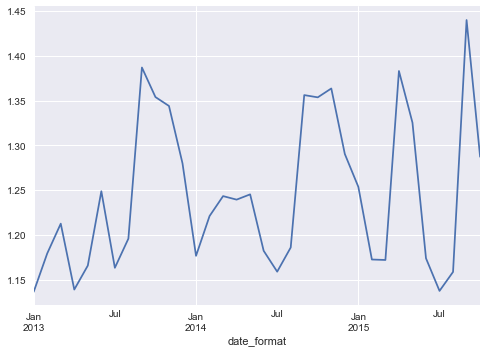

In [34]:
plt.style.use('seaborn')
train.copy().set_index('date_format').item_cnt_day.resample('M') \
                            .mean().plot();

<AxesSubplot:xlabel='item_price'>

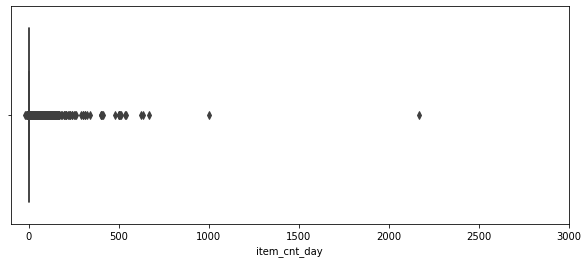

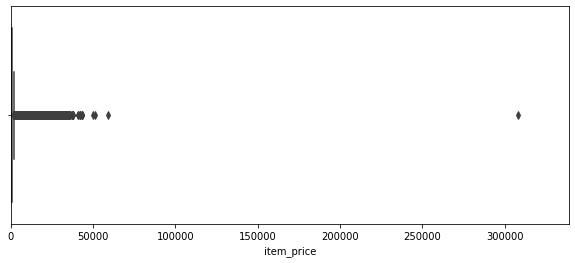

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=train.item_cnt_day)

plt.figure(figsize=(10,4))
plt.xlim(train.item_price.min(), train.item_price.max()*1.1)
sns.boxplot(x=train.item_price)

We see there are outlierws in item_cnt_day and item price 

In [20]:
train = train[train.item_price < 100000]
train = train[train.item_cnt_day < 1001]
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


<AxesSubplot:xlabel='item_price'>

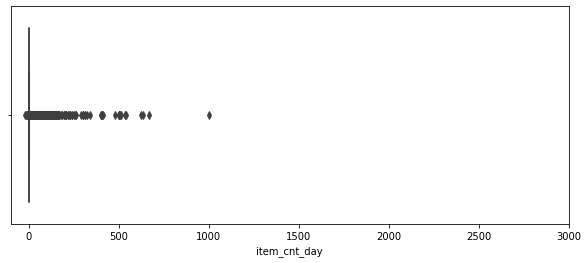

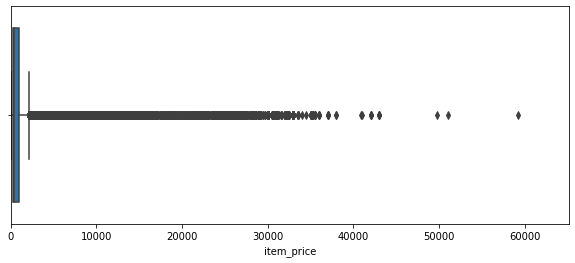

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=train.item_cnt_day)

plt.figure(figsize=(10,4))
plt.xlim(train.item_price.min(), train.item_price.max()*1.1)
sns.boxplot(x=train.item_price)

In [38]:
select_price_below_zero = train.loc[train['item_price'] <= 0]
print (select_price_below_zero)

              date  date_block_num  shop_id  item_id  item_price  \
484683  15.05.2013               4       32     2973        -1.0   

        item_cnt_day date_format  
484683           1.0  2013-05-15  


In [39]:
median = train[(train.shop_id==32)&(train.item_id==2973)&(train.date_block_num==4)&(train.item_price>0)].item_price.median()

In [40]:
print(median)

1874.0


In [41]:
train.loc[train.item_price<0, 'item_price'] = median

In [42]:
select_price_below_zero = train.loc[train['item_price'] <= 0]
print (select_price_below_zero)

Empty DataFrame
Columns: [date, date_block_num, shop_id, item_id, item_price, item_cnt_day, date_format]
Index: []


In [57]:
shops.loc[shops.duplicated(subset=['shop_name']), :]

,shop_name,shop_id


In [52]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [59]:
train.loc[train.duplicated(subset=['shop_id']), :]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_format
2,05.01.2013,0,25,2552,899.00,-1.0,2013-01-05
3,06.01.2013,0,25,2554,1709.05,1.0,2013-01-06
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15
5,10.01.2013,0,25,2564,349.00,1.0,2013-01-10
6,02.01.2013,0,25,2565,549.00,1.0,2013-01-02
...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,2015-10-10
2935845,09.10.2015,33,25,7460,299.00,1.0,2015-10-09
2935846,14.10.2015,33,25,7459,349.00,1.0,2015-10-14
2935847,22.10.2015,33,25,7440,299.00,1.0,2015-10-22
